In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
# Database Connection
# Database connection setup using SQLAlchemy
engine = create_engine('mssql+pyodbc://BURALE/GeneralHospital?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')

def execute_query(query):
    try:
        df = pd.read_sql(query, engine)
        print("Query executed successfully")
        return df
    except Exception as e:
        print(f"Error executing query: {e}")
        return pd.DataFrame()

print("Database connection setup successfully")


Database connection setup successfully


In [3]:
# Load Data
# Query to get the surgical outcome data
query_surgical_outcome = """
SELECT 
    s.[Surgery ID],
    s.[Master Patient ID],
    s.[Surgical Admission Date],
    s.[Surgical Discharge Date],
    s.[Surgical LOS],
    s.[Surgical DRG Description],
    s.[Surgical Total Cost],
    s.[Surgical Total Profit],
    c.[Surgical Resource Name],
    c.[Surgical Resource Cost]
FROM 
    [dbo].[SurgicalEncounters] s
JOIN [dbo].[SurgicalCosts] c ON s.[Surgery ID] = c.[Surgery ID]
"""

# Load the data
df = execute_query(query_surgical_outcome)

if df.empty:
    print("No data loaded. Exiting.")
else:
    print(df.info())
    print(df.head())


Query executed successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121413 entries, 0 to 121412
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Surgery ID                121413 non-null  int64         
 1   Master Patient ID         121413 non-null  int64         
 2   Surgical Admission Date   121413 non-null  datetime64[ns]
 3   Surgical Discharge Date   121413 non-null  datetime64[ns]
 4   Surgical LOS              121413 non-null  int64         
 5   Surgical DRG Description  121413 non-null  object        
 6   Surgical Total Cost       121413 non-null  float64       
 7   Surgical Total Profit     121413 non-null  float64       
 8   Surgical Resource Name    121413 non-null  object        
 9   Surgical Resource Cost    121413 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 9.3+ MB
None
   Surgery ID  Mast

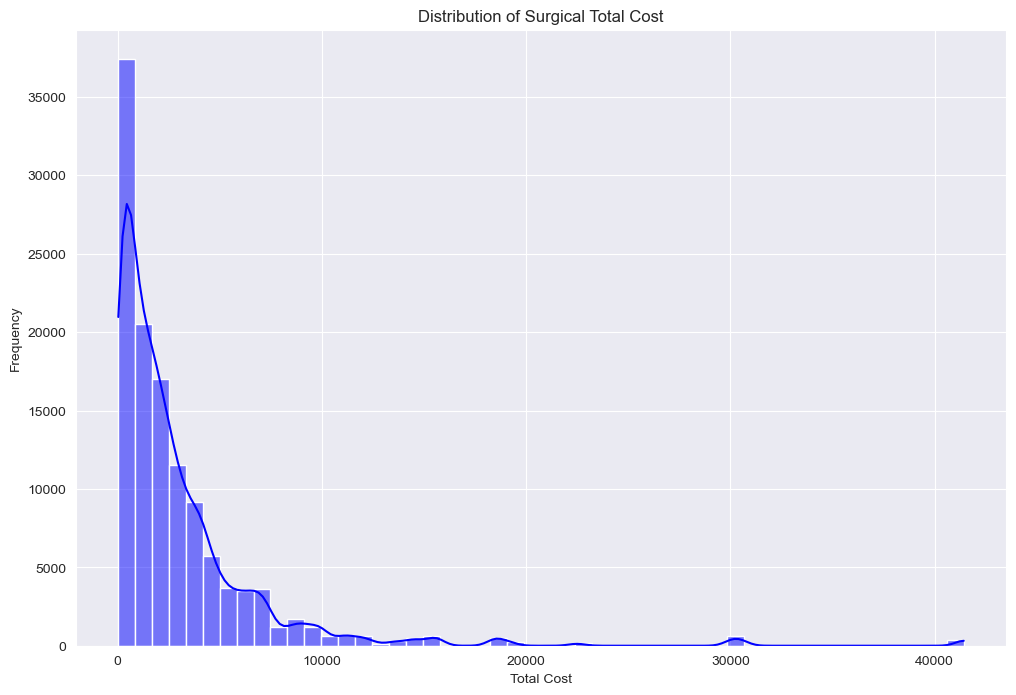

In [4]:
# Visualize Data
# Simple plot to verify data loading
plt.figure(figsize=(12, 8))
sns.histplot(df['Surgical Total Cost'], bins=50, kde=True, color='blue')
plt.title('Distribution of Surgical Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()


Query executed successfully


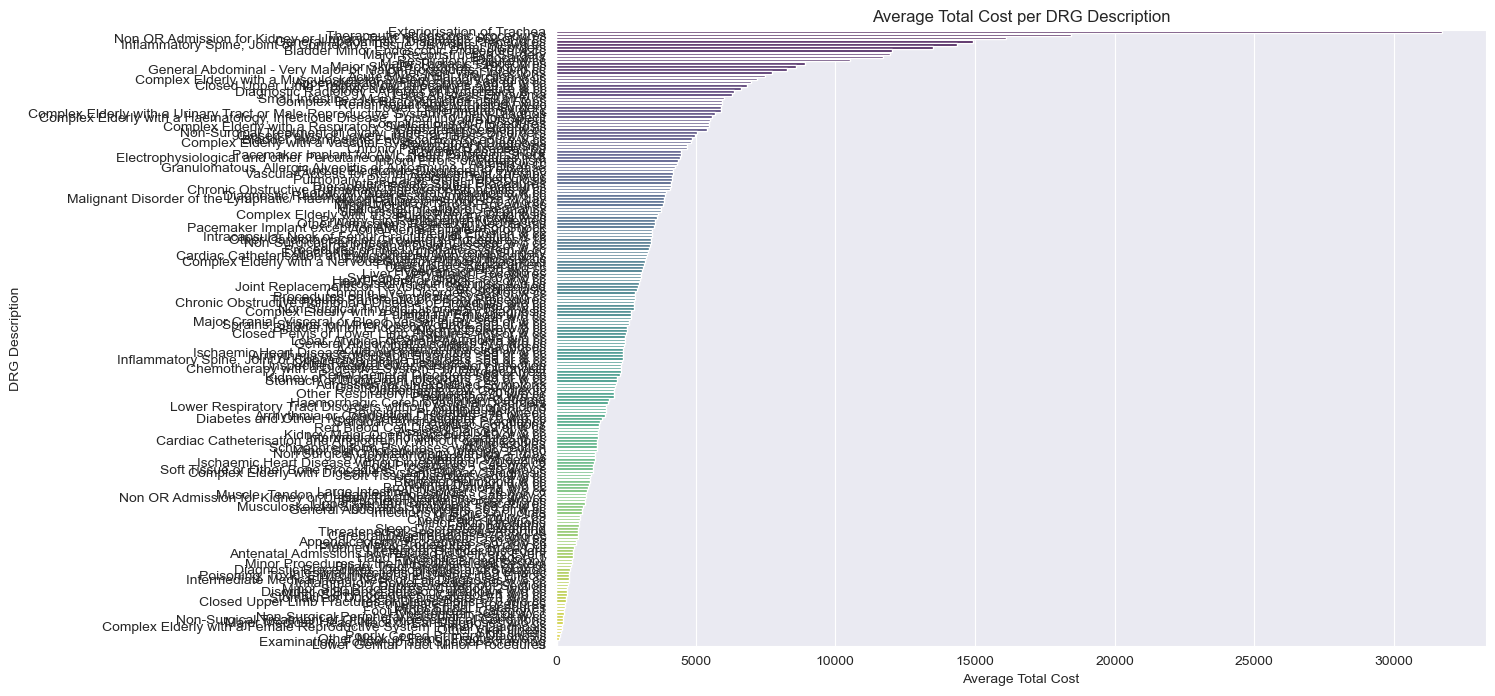

In [10]:
#  Joins and Aggregations
# Query 1: Joins and Aggregations
query_1 = """
-- Average cost and profit per DRG Description
SELECT 
    s.[Surgical DRG Description],
    AVG(s.[Surgical Total Cost]) AS Avg_Total_Cost,
    AVG(s.[Surgical Total Profit]) AS Avg_Total_Profit
FROM 
    [dbo].[SurgicalEncounters] s
JOIN [dbo].[SurgicalCosts] c ON s.[Surgery ID] = c.[Surgery ID]
GROUP BY s.[Surgical DRG Description]
ORDER BY Avg_Total_Cost DESC;
"""
df_agg = execute_query(query_1)

# Plot 1: Average Cost and Profit per DRG Description
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Total_Cost', y='Surgical DRG Description', hue='Surgical DRG Description', data=df_agg, palette='viridis', legend=False)
plt.title('Average Total Cost per DRG Description')
plt.xlabel('Average Total Cost')
plt.ylabel('DRG Description')
plt.show()



Query executed successfully


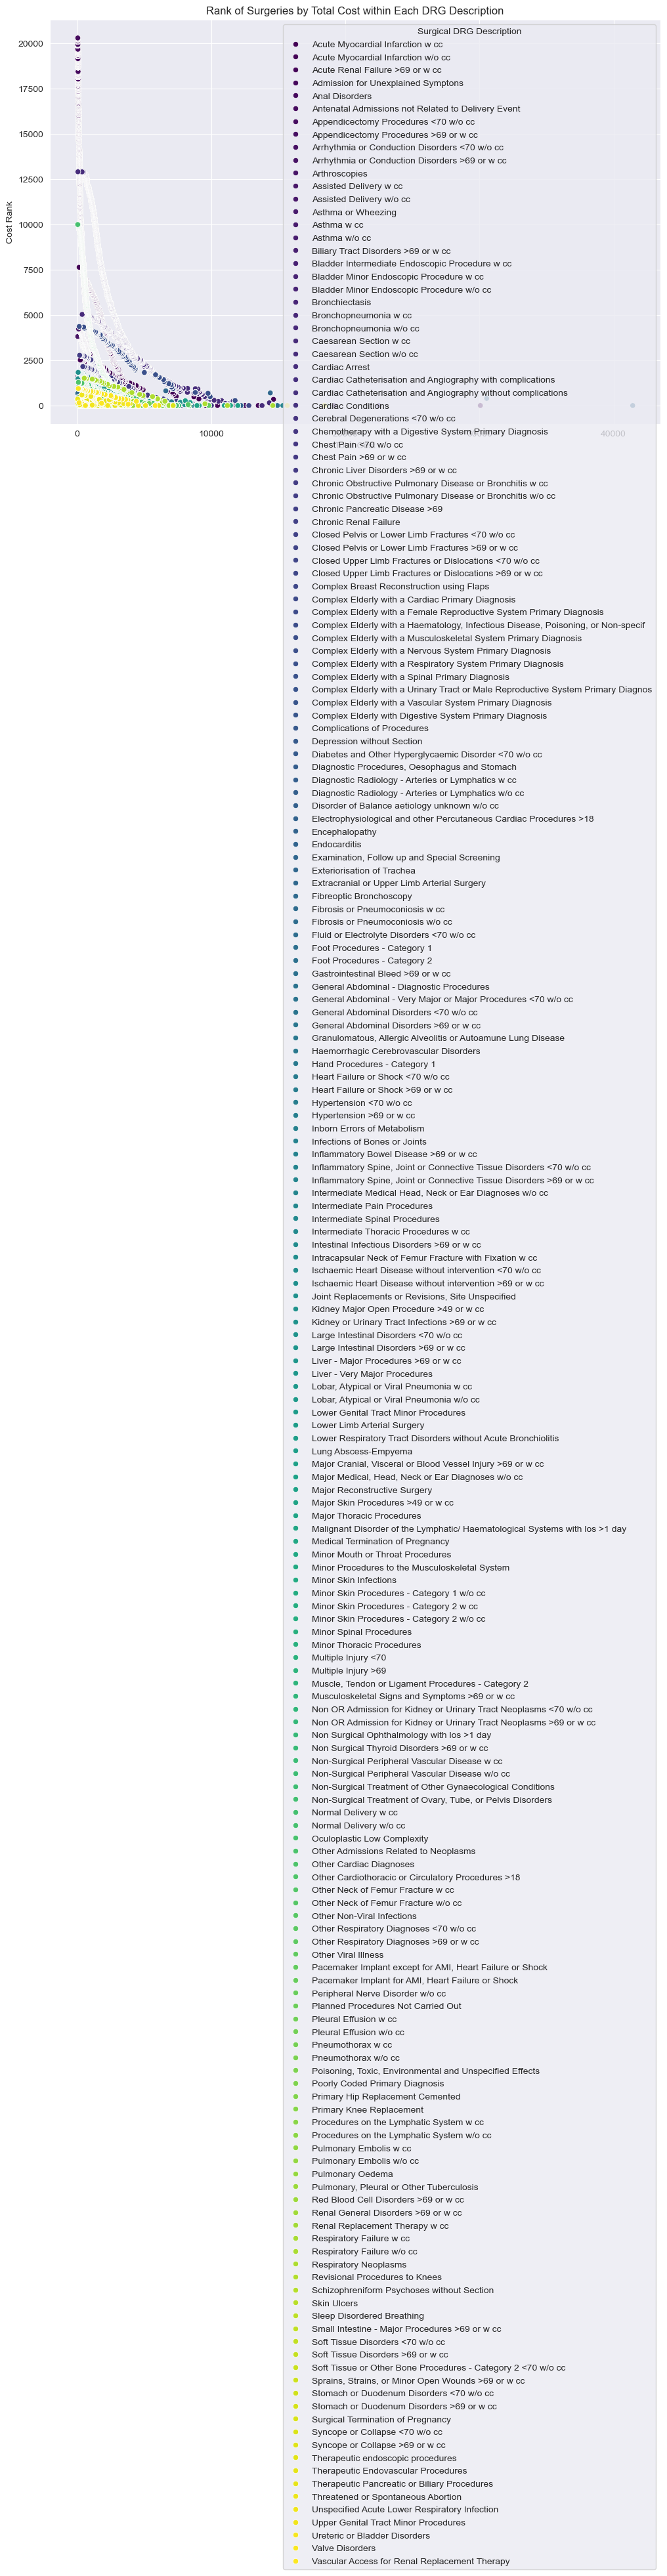

In [6]:
# Window Functions
# Query 2: Window Functions
query_2 = """
-- Rank surgeries by total cost within each DRG Description
SELECT 
    s.[Surgery ID],
    s.[Master Patient ID],
    s.[Surgical DRG Description],
    s.[Surgical Total Cost],
    RANK() OVER (PARTITION BY s.[Surgical DRG Description] ORDER BY s.[Surgical Total Cost] DESC) AS Cost_Rank
FROM 
    [dbo].[SurgicalEncounters] s
JOIN [dbo].[SurgicalCosts] c ON s.[Surgery ID] = c.[Surgery ID];
"""
df_rank = execute_query(query_2)

# Plot 2: Rank of Surgeries by Total Cost within Each DRG Description
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Surgical Total Cost', y='Cost_Rank', hue='Surgical DRG Description', data=df_rank, palette='viridis')
plt.title('Rank of Surgeries by Total Cost within Each DRG Description')
plt.xlabel('Total Cost')
plt.ylabel('Cost Rank')
plt.legend(title='Surgical DRG Description')
plt.show()


Query executed successfully


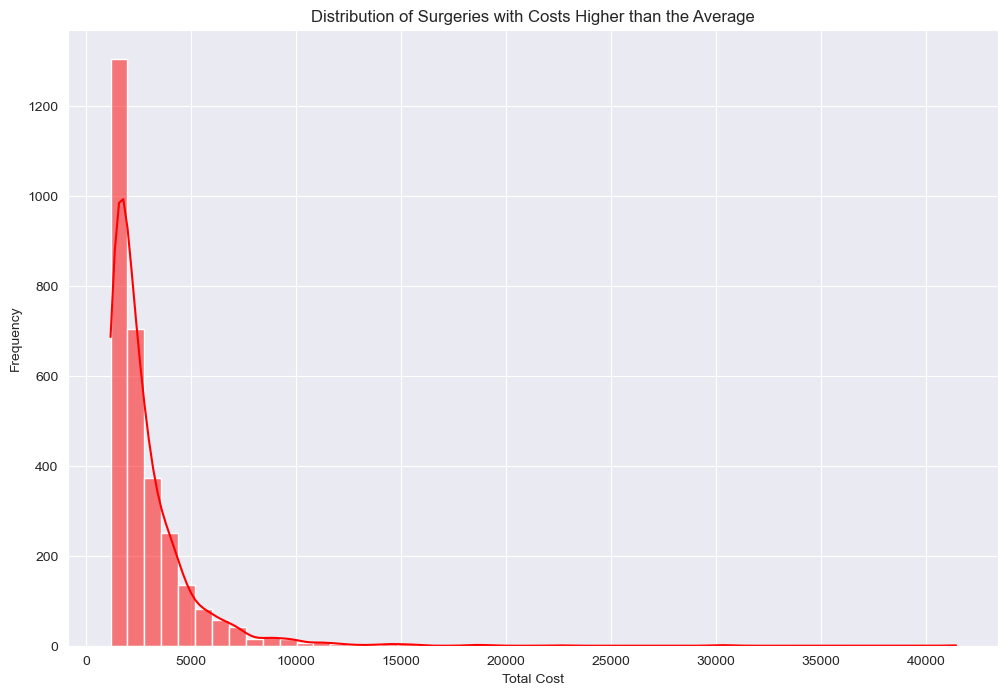

In [7]:
# Subqueries and CTEs
# Query 3: Subqueries and CTEs
query_3 = """
-- Surgeries with costs higher than the average cost
WITH AvgCost AS (
    SELECT AVG([Surgical Total Cost]) AS Avg_Cost
    FROM [dbo].[SurgicalEncounters]
)
SELECT 
    s.[Surgery ID],
    s.[Master Patient ID],
    s.[Surgical Total Cost]
FROM 
    [dbo].[SurgicalEncounters] s
JOIN AvgCost a ON s.[Surgical Total Cost] > a.Avg_Cost;
"""
df_high_cost = execute_query(query_3)

# Plot 3: Distribution of Surgeries with Costs Higher than the Average
plt.figure(figsize=(12, 8))
sns.histplot(df_high_cost['Surgical Total Cost'], bins=50, kde=True, color='red')
plt.title('Distribution of Surgeries with Costs Higher than the Average')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()


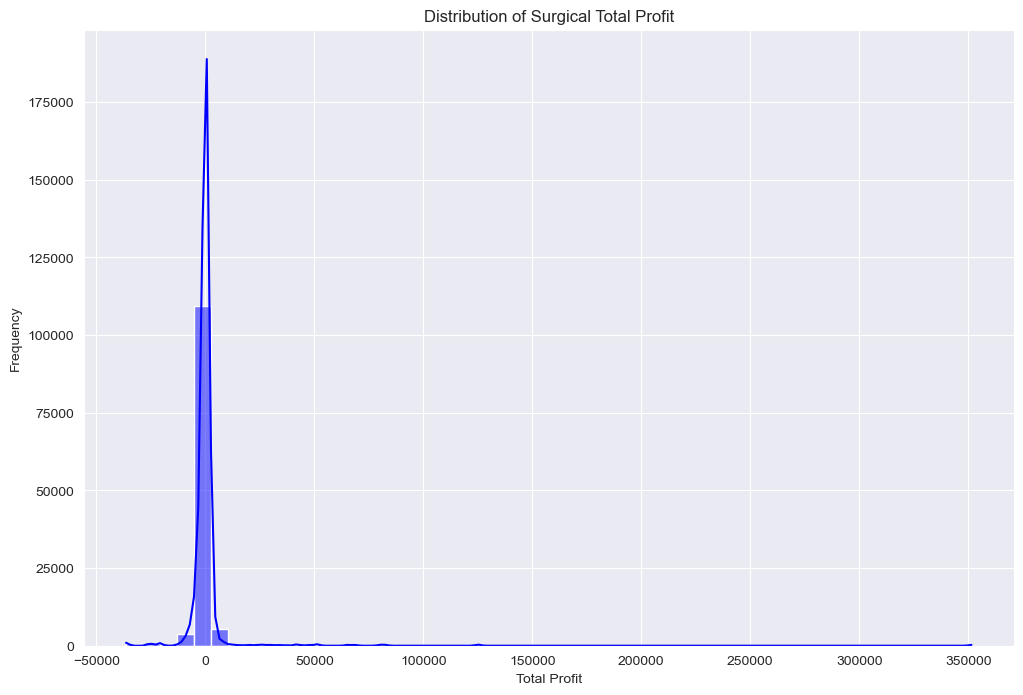

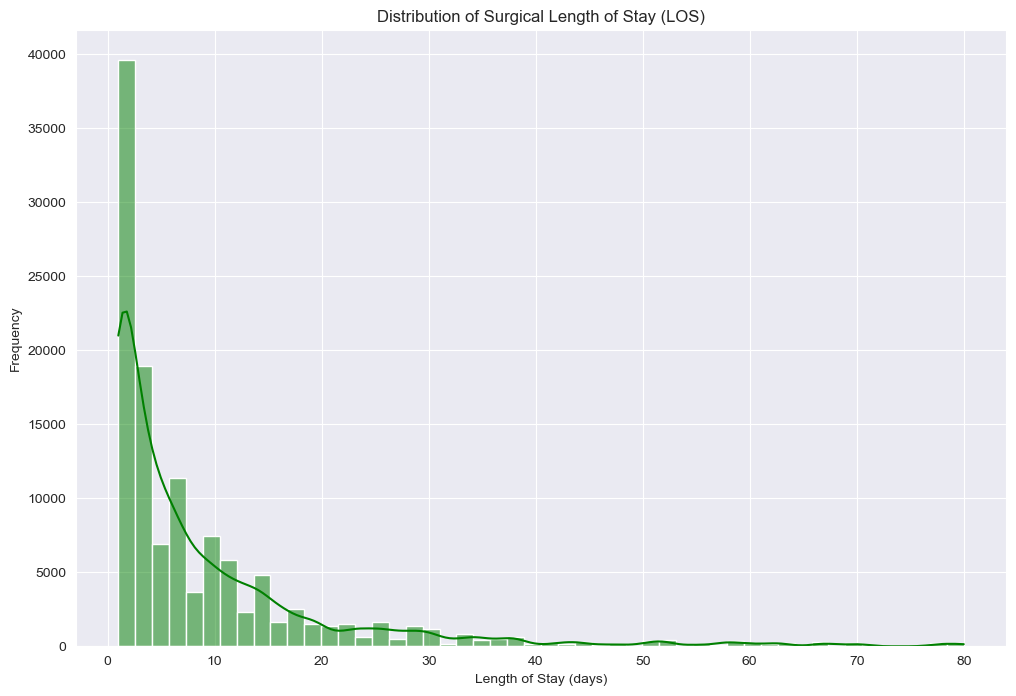

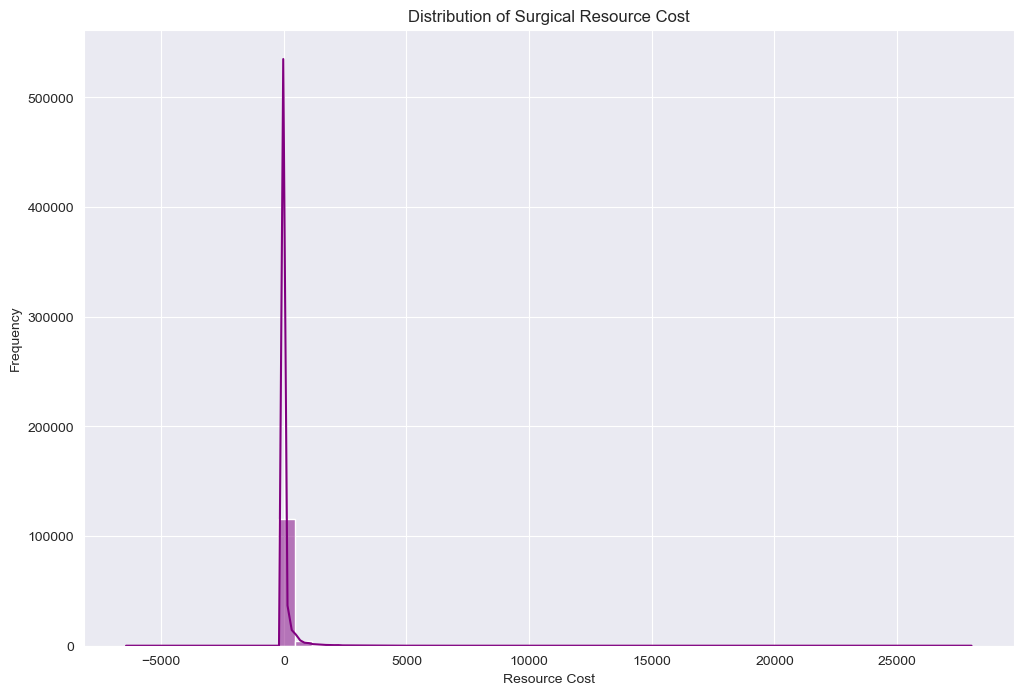

In [8]:
# Additional Visualizations
# Additional Visualizations
# Plot 4: Distribution of Surgical Total Profit
plt.figure(figsize=(12, 8))
sns.histplot(df['Surgical Total Profit'], bins=50, kde=True, color='blue')
plt.title('Distribution of Surgical Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.show()

# Plot 5: Distribution of Surgical Length of Stay (LOS)
plt.figure(figsize=(12, 8))
sns.histplot(df['Surgical LOS'], bins=50, kde=True, color='green')
plt.title('Distribution of Surgical Length of Stay (LOS)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# Plot 6: Distribution of Surgical Resource Cost
plt.figure(figsize=(12, 8))
sns.histplot(df['Surgical Resource Cost'], bins=50, kde=True, color='purple')
plt.title('Distribution of Surgical Resource Cost')
plt.xlabel('Resource Cost')
plt.ylabel('Frequency')
plt.show()


Starting machine learning section
Training the model
Mean Absolute Error: 1740.5407533718687
Mean Squared Error: 37530971.577374846
R^2 Score: 0.7729851780851327


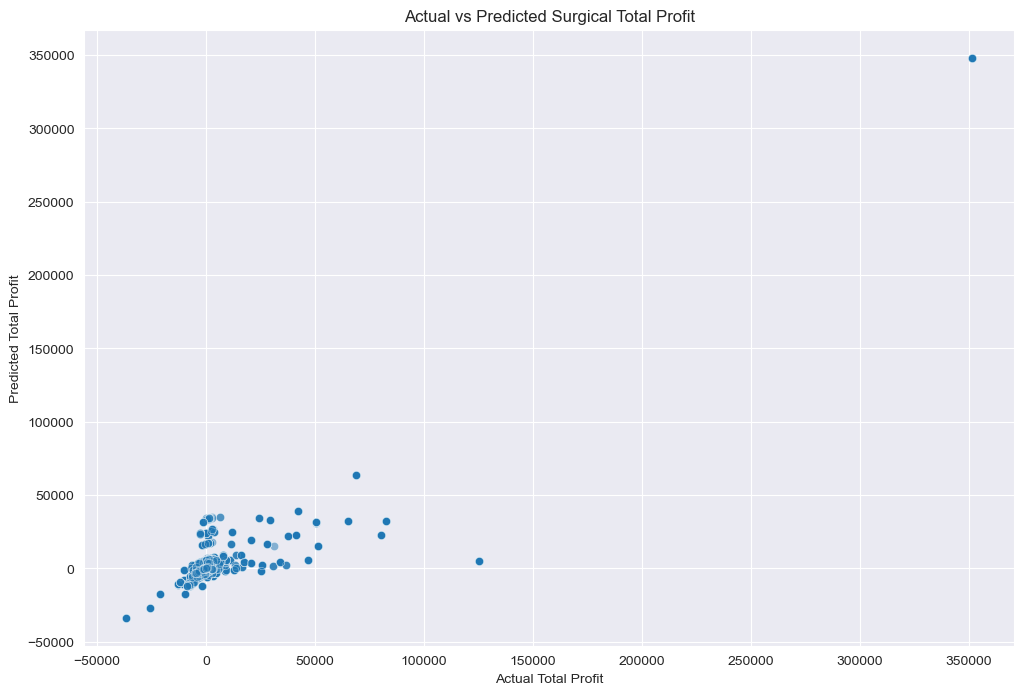

In [9]:
# Machine Learning: Predicting Surgical Total Profit
print("Starting machine learning section")

# Select features and target variable
features = ['Surgical LOS', 'Surgical Total Cost', 'Surgical Resource Cost', 'Surgical DRG Description']
target = 'Surgical Total Profit'

# Handle categorical data
categorical_features = ['Surgical DRG Description']
numerical_features = ['Surgical LOS', 'Surgical Total Cost', 'Surgical Resource Cost']

# Preprocess data
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

print("Training the model")
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot: Actual vs Predicted Surgical Total Profit
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title('Actual vs Predicted Surgical Total Profit')
plt.xlabel('Actual Total Profit')
plt.ylabel('Predicted Total Profit')
plt.show()
